In [83]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from datetime import datetime
from scipy.stats import ttest_ind

%matplotlib inline

In [84]:
df_1 = pd.read_csv('../data/raw/train_df.csv', sep=',')
df_2 = pd.read_csv('../data/raw/test_df.csv', sep=',')
df_3 = pd.read_csv('../data/raw/val_df.csv', sep=',')

In [85]:
df = pd.concat([df_1, df_2, df_3], ignore_index=True)
df

,id,text,label,sentiment
0,9536,"Cooking microwave pizzas, yummy",2,positive
1,6135,Any plans of allowing sub tasks to show up in ...,1,neutral
2,17697,"I love the humor, I just reworded it. Like sa...",2,positive
3,14182,naw idk what ur talkin about,1,neutral
4,17840,That sucks to hear. I hate days like that,0,negative
...,...,...,...,...
41638,9043,Not sure what happened but now I have to hit t...,1,neutral
41639,6160,"Pretty good app, lets you organize tasks by ca...",2,positive
41640,5655,This app is a piece of sh**. It won't sync my ...,0,negative
41641,11834,": Very interested. However, low carbs for the ...",2,positive


# Data Cleaning

In [71]:
# Checking missing values
df.isnull().sum()

id           0
text         1
label        0
sentiment    0
dtype: int64

In [72]:
# Remove rows where the 'text' column has missing values
df = df.dropna(subset=['text'])

In [73]:
# Checking missing values
df.isnull().sum()

id           0
text         0
label        0
sentiment    0
dtype: int64

In [64]:
# Checking the duplicates
df.duplicated().sum()

0

In [74]:
# checking the unique values
df.nunique()

id           27481
text         41642
label            3
sentiment        3
dtype: int64

In [75]:
for column in df.columns:
    print(f"Unique values in column '{column}':")
    print(df[column].unique())
    print("\n") 

Unique values in column 'id':
[ 9536  6135 17697 ... 15694 20345 11834]


Unique values in column 'text':
['Cooking microwave pizzas, yummy'
 'Any plans of allowing sub tasks to show up in the widget?'
 " I love the humor, I just reworded it. Like saying 'group therapy' instead`a 'gang banging'. Keeps my moms off my back.   Hahaha"
 ...
 "This app is a piece of sh**. It won't sync my old wunderlists. Shared lists don't work. I'll be uninstalling and going with a different app. Thanks Microsoft for taking a fantastic app (Wunderlist) and ruining it."
 ': Very interested. However, low carbs for the next month means no beer for me'
 'Good app, but not exactly what I was looking for. This app uses your calendar events and organizes them in the circle. The controls are great, I love when I move the red time bar it scrolls through all the things and shows the time changing. Love the widget. I wanted this to work out a homeschool schedule. I ended up having to make a new calendar and syncing 

In [86]:
df = df.rename(columns = {'label': 'target'})

In [87]:
# Distribution of the target
label_counts = df['target'].value_counts()

In [88]:
label_counts

target
1    15507
2    13968
0    12168
Name: count, dtype: int64

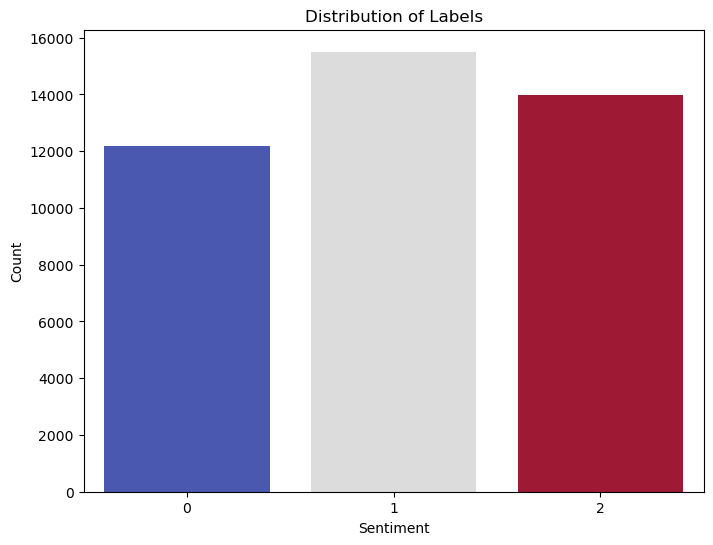

In [89]:
# Create a bar plot for target distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette='coolwarm', dodge=False, legend=False)

plt.title('Distribution of Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [95]:
# Balance the dataset using Undersampling Majority Class: 
# This involves reducing the number of samples in the majority class ('1') 
# to match the number of samples in the minority classes ('0' and '2').

from imblearn.under_sampling import RandomUnderSampler

# Find the minimum number of samples in any class
min_class_samples = min(df['target'].value_counts())

# Define custom sampling strategy to make all classes have the same number of samples
undersample = RandomUnderSampler(sampling_strategy={0: min_class_samples, 1: min_class_samples, 2: min_class_samples})

# Apply undersampling
X_under, y_under = undersample.fit_resample(X, y)

# Create new balanced DataFrame
df_balanced = pd.DataFrame(X_under, columns=['id', 'text', 'sentiment'])
df_balanced['target'] = y_under

# Verify new class distribution
print(df_balanced['target'].value_counts())


target
0    12168
1    12168
2    12168
Name: count, dtype: int64


In [96]:
df_balanced

,id,text,sentiment,target
38002,26753,is cursing AB`s wardrobe handles. One drew blood,negative,0
4513,3404,"I'm a pro user, worked great initially but it ...",negative,0
9688,16949,noo I`m in miami and I just wanna lay out in...,negative,0
27715,2667,Please help. Relogging in after several months...,negative,0
10784,21965,haha calm down. Youll get ur shades. I`m stil...,negative,0
...,...,...,...,...
26995,3977,It is a great app. The only problem i have is ...,positive,2
15920,987,"if so, the TMobile G1 is the Hummer H1. I wis...",positive,2
3823,27451,happy all my studying and all nighters payed off,positive,2
36488,8022,Finally something that lets me feel like I'm u...,positive,2


In [98]:
# Distribution of the target
label_counts = df_balanced['target'].value_counts()

label_counts

target
0    12168
1    12168
2    12168
Name: count, dtype: int64

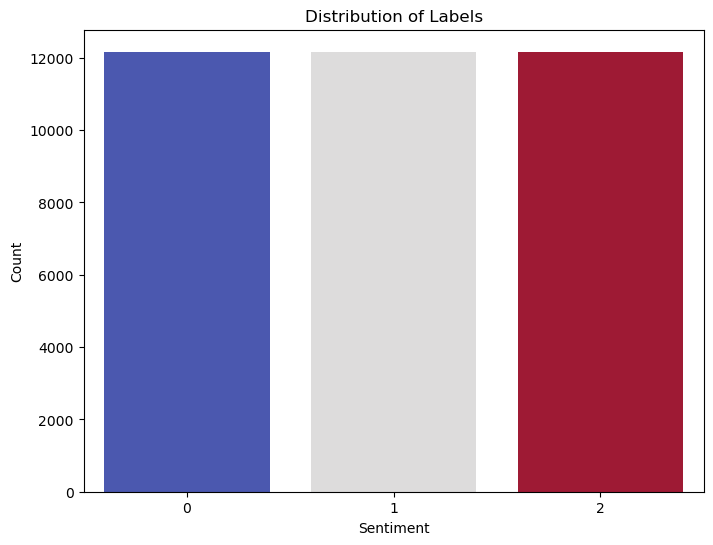

In [99]:
# Create a bar plot for target distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=label_counts.index, y=label_counts.values, hue=label_counts.index, palette='coolwarm', dodge=False, legend=False)

plt.title('Distribution of Labels')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

In [100]:
df_balanced.to_csv('../data/clean/df_0.csv', index=False)